# Multiple Models Analysis

In [1]:
import sys, os
sys.path.append('/home/jupyterhubadmin/.virtualenvs/meow/local/lib/python2.7/site-packages/')
os.chdir('../')

In [2]:
# Import Everything we need
#import setup

from DLAnalysis.Scan import *
from DLAnalysis.LoadModel import *
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


Using Theano backend.


Couldn't import dot_parser, loading of dot files will not be possible.


In [3]:
# Choose the Models to look at
import glob
#ModelDirs=filter(lambda n: n[-1]!="1", glob.glob("TrainedModels/*.1"))
ModelDirs=glob.glob("TrainedModels/*")

MyModels=LoadModels(ModelDirs,MetaDataOnly=True)

In [4]:
# Prep the Models

# Rename the Models using Width and Depth
#ResetNames(MyModels,["Width","Depth","lr","decay","optimizer"])
ResetNames(MyModels,["Width","Depth"])

# Add the number of epochs to MetaData by counting length of history
GetEpochs(MyModels)

# Pull data from previous trainings into latest MetaData, with "All_" suffix
print "Historical Parameters:",GetHistorical(MyModels) 

Historical Parameters: []


In [5]:
# Get a List of all numbers stored in MetaData
print "Available Parameters:", GetGoodParams(MyModels)

Available Parameters: ['Width', 'Depth', 'Pi0_AUC', 'HyperParamSet', 'decay', 'lr', 'Epochs', 'Gamma_AUC']


In [6]:
# Make a Table of all relevant parameter
# Note: Parameters are optional... but the columns and rows will be not optimally sorted.
ScanTable(MyModels,['Model Name', 'optimizer', "lr","decay",'Pi0_AUC','Gamma_AUC'],[4,5])

Model Name        optimizer        lr    decay    Pi0_AUC    Gamma_AUC
----------------  -----------  ------  -------  ---------  -----------
Width=16 Depth=1  'Adam'       0.0010   0.0100     0.7179       0.7179


Number of Models: 1
Model Name                              Pi0_AUC    Gamma_AUC    FinalScore[0]
------------------------------------  ---------  -----------  ---------------
Width=16 Depth=1 lr=0.001 decay=0.01     0.7179       0.7179           0.5358


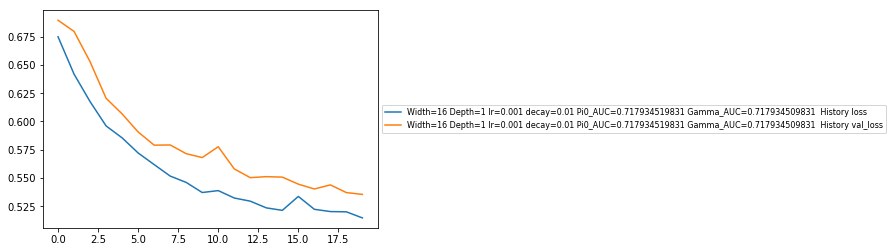

In [7]:
# Plot Historical MetaData... put 4 models per plot
#PlotMetaDataMany(MyModels,4,["History","val_loss"],loc="center left")
def AnalyzeSubset(expression,labels=["Width","Depth","lr","decay"]):
    ResetNames(MyModels,labels)
    M1=SelectModels(MyModels,MetaDataEvaluator(expression,params=["optimizer"]))
    print "Number of Models:",len(M1)
    ScanTable(M1,['Model Name','Pi0_AUC','Gamma_AUC',"FinalScore[0]"],[1,2])
    ResetNames(MyModels,["Width","Depth","lr","decay",'Pi0_AUC','Gamma_AUC'])
    PlotMetaDataMany(M1,4,
                     [["History","loss"],["History","val_loss"]],
                     sort=["Width","Depth","lr","decay"],switch=["Width","Depth"],loc="center left")
    
AnalyzeSubset("optimizer=='Adam'")
#AnalyzeSubset("optimizer=='RMSprop'")
#AnalyzeSubset("optimizer=='SGD'")

Number of Models: 22
Model Name                               Pi0_AUC    Gamma_AUC    FinalScore[0]
-------------------------------------  ---------  -----------  ---------------
Width=16 Depth=1 lr=0.01 decay=0.001      0.4644       0.5039           0.7064
Width=16 Depth=1 lr=0.01 decay=0.01       0.4656       0.5455           0.6934
Width=64 Depth=1 lr=0.01 decay=0.001      0.4661       0.5000           8.0573
Width=32 Depth=2 lr=0.001 decay=0.001     0.5000       0.4905           8.0573
Width=16 Depth=2 lr=0.001 decay=0.001     0.5000       0.5000           8.0608
Width=32 Depth=2 lr=0.01 decay=0.001      0.5000       0.5000           8.0734
Width=16 Depth=2 lr=0.01 decay=0.001      0.5000       0.5000           0.6931
Width=64 Depth=2 lr=0.01 decay=0.001      0.5000       0.5840           8.0573
Width=64 Depth=1 lr=0.01 decay=0.01       0.5000       0.6512           8.0608
Width=32 Depth=1 lr=0.01 decay=0.01       0.5000       0.6538           8.0447
Width=64 Depth=2 lr=0.001 decay

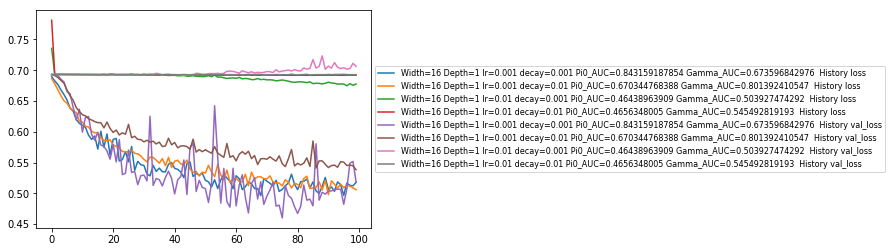

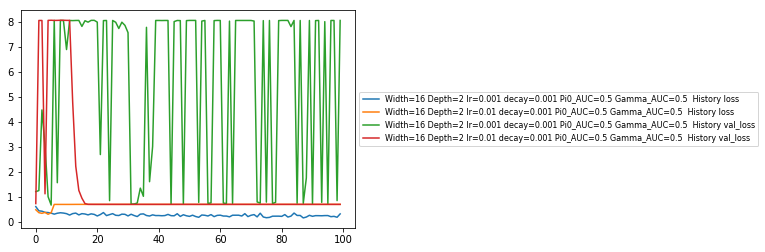

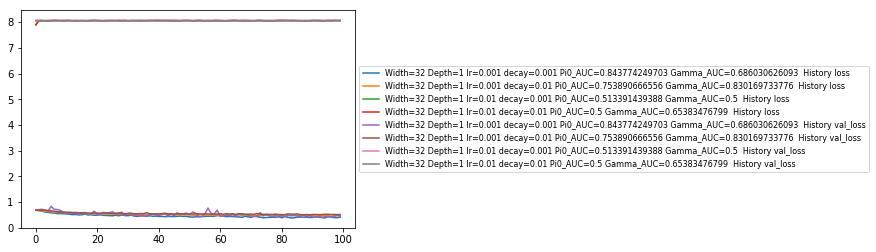

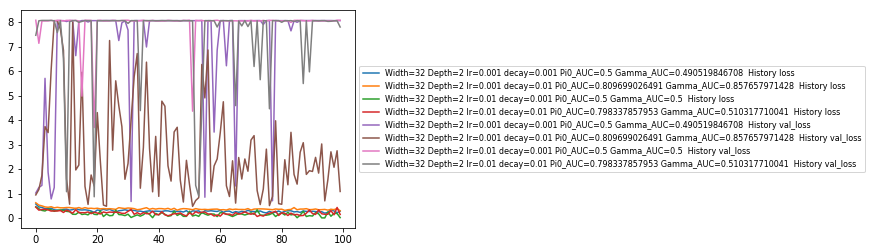

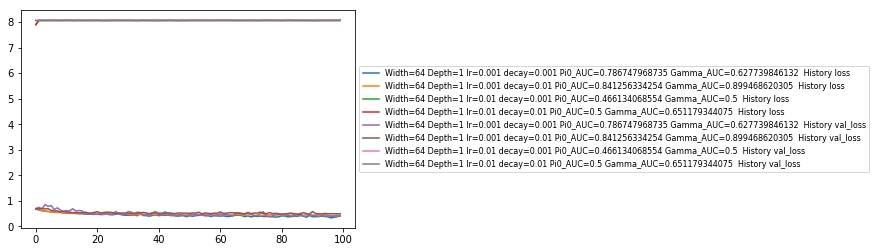

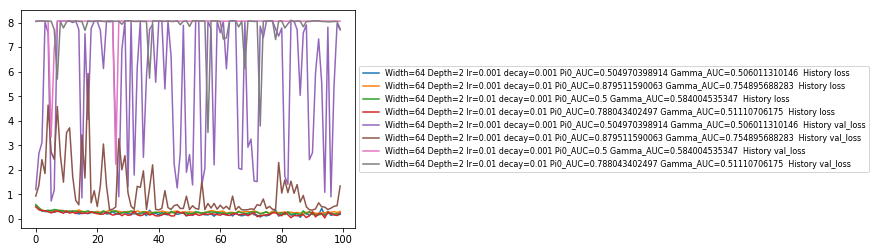

In [8]:
AnalyzeSubset("optimizer=='RMSprop'")

Number of Models: 19
Model Name                               Pi0_AUC    Gamma_AUC    FinalScore[0]
-------------------------------------  ---------  -----------  ---------------
Width=64 Depth=1 lr=0.001 decay=0.01      0.4550       0.6223           0.6926
Width=16 Depth=1 lr=0.01 decay=0.01       0.4588       0.6201           0.6921
Width=16 Depth=1 lr=0.001 decay=0.01      0.4609       0.6217           0.6929
Width=32 Depth=1 lr=0.001 decay=0.001     0.4637       0.6260           0.6927
Width=16 Depth=1 lr=0.001 decay=0.001     0.4717       0.6370           0.6925
Width=32 Depth=1 lr=0.001 decay=0.01      0.4830       0.5788           0.6927
Width=32 Depth=2 lr=0.001 decay=0.001     0.4836       0.6386           0.6905
Width=32 Depth=2 lr=0.001 decay=0.01      0.4846       0.6294           0.6918
Width=16 Depth=1 lr=0.01 decay=0.001      0.4853       0.6442           0.6888
Width=16 Depth=2 lr=0.001 decay=0.001     0.4935       0.6596           0.6918
Width=64 Depth=1 lr=0.01 decay=

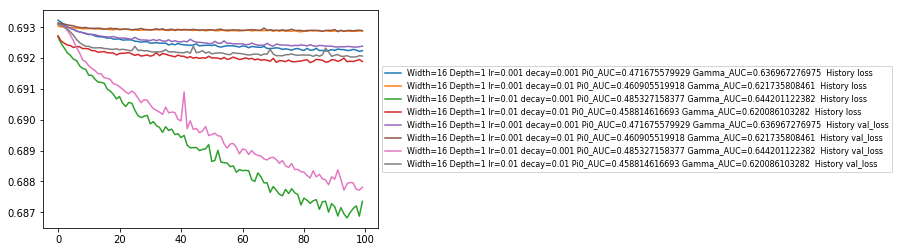

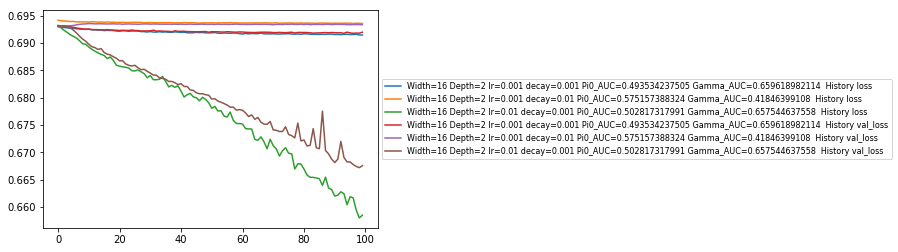

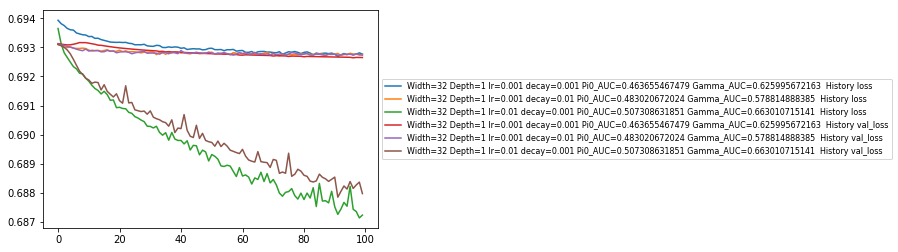

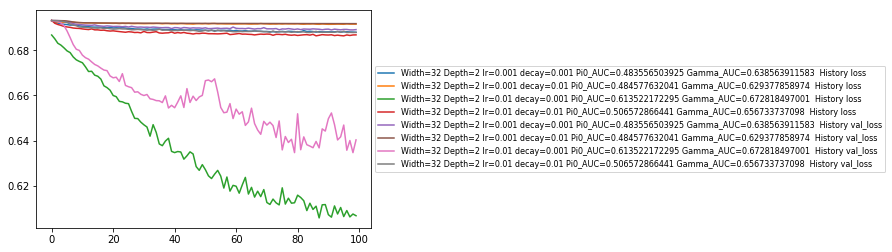

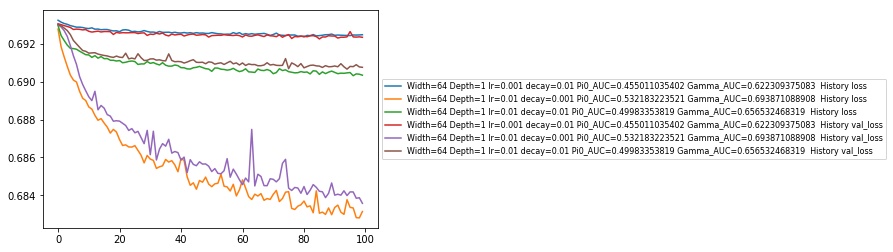

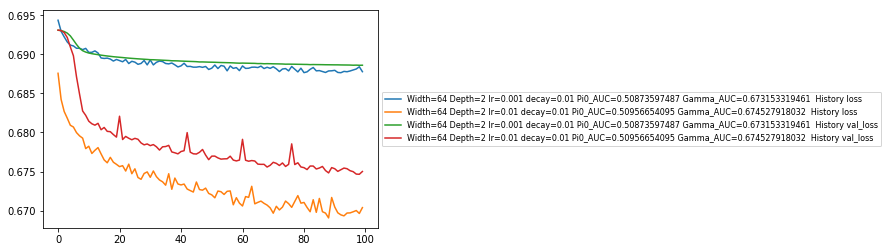

In [9]:
AnalyzeSubset("optimizer=='SGD'")

Number of Models: 31
Model Name                              Pi0_AUC    Gamma_AUC    FinalScore[0]
------------------------------------  ---------  -----------  ---------------
Width=64 Depth=1 lr=0.01 decay=0.001     0.4459       0.5770           0.6934
Width=16 Depth=1 lr=0.01 decay=0.01      0.4588       0.6201           0.6921
Width=16 Depth=1 lr=0.01 decay=0.001     0.4644       0.5039           0.7064
Width=16 Depth=1 lr=0.01 decay=0.01      0.4656       0.5455           0.6934
Width=64 Depth=1 lr=0.01 decay=0.001     0.4661       0.5000           8.0573
Width=16 Depth=1 lr=0.01 decay=0.001     0.4853       0.6442           0.6888
Width=32 Depth=2 lr=0.01 decay=0.001     0.4994       0.6529           8.0452
Width=64 Depth=1 lr=0.01 decay=0.01      0.4998       0.6565           0.6911
Width=32 Depth=2 lr=0.01 decay=0.001     0.5000       0.5000           8.0734
Width=16 Depth=2 lr=0.01 decay=0.001     0.5000       0.5000           0.6931
Width=64 Depth=2 lr=0.01 decay=0.001     0.

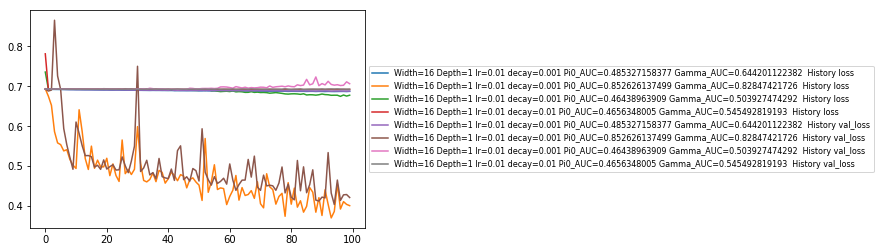

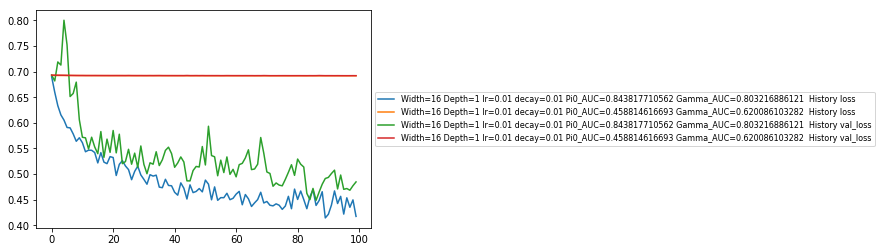

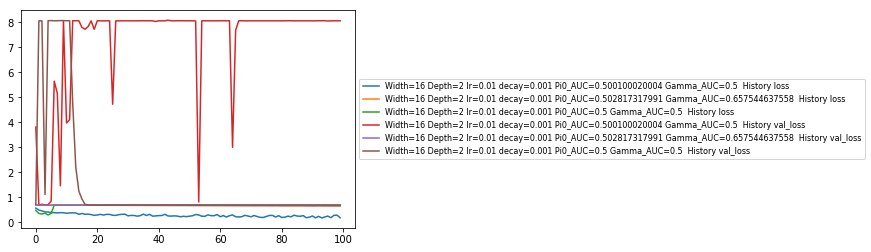

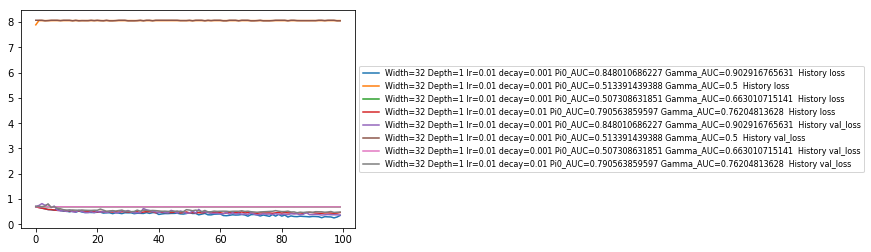

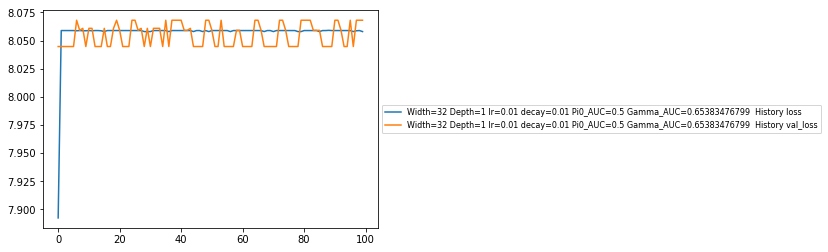

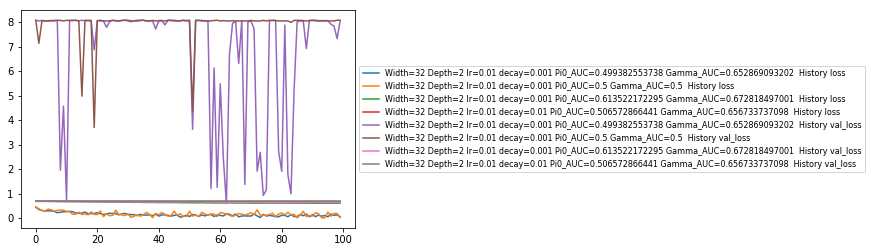

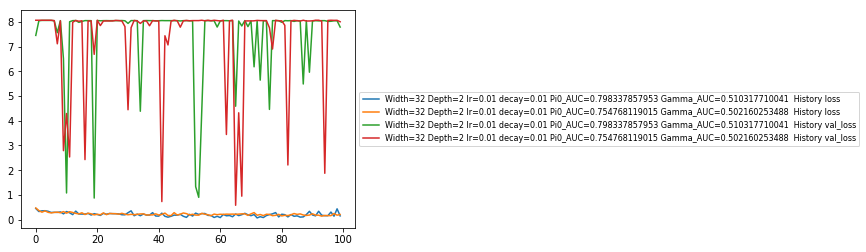

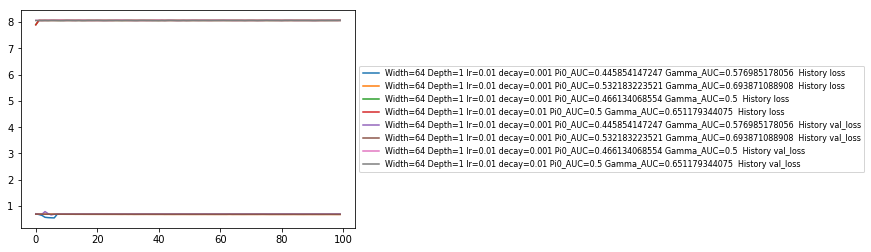

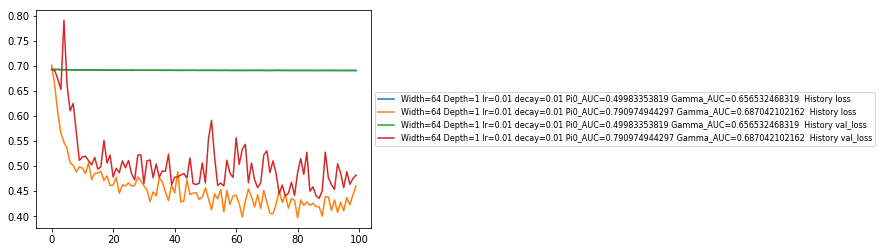

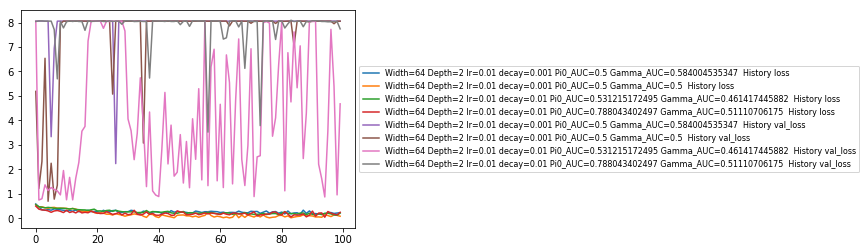

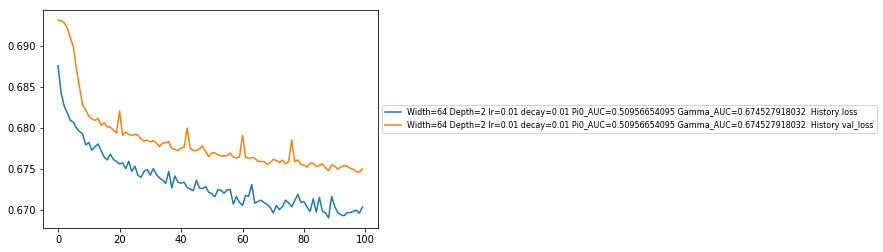

In [10]:
AnalyzeSubset("lr==0.01")

Number of Models: 32
Model Name                               Pi0_AUC    Gamma_AUC    FinalScore[0]
-------------------------------------  ---------  -----------  ---------------
Width=64 Depth=1 lr=0.001 decay=0.01      0.4550       0.6223           0.6926
Width=16 Depth=1 lr=0.001 decay=0.01      0.4609       0.6217           0.6929
Width=32 Depth=1 lr=0.001 decay=0.001     0.4637       0.6260           0.6927
Width=16 Depth=1 lr=0.001 decay=0.001     0.4717       0.6370           0.6925
Width=32 Depth=1 lr=0.001 decay=0.01      0.4830       0.5788           0.6927
Width=32 Depth=2 lr=0.001 decay=0.001     0.4836       0.6386           0.6905
Width=32 Depth=2 lr=0.001 decay=0.01      0.4846       0.6294           0.6918
Width=16 Depth=2 lr=0.001 decay=0.001     0.4935       0.6596           0.6918
Width=32 Depth=2 lr=0.001 decay=0.001     0.5000       0.4905           8.0573
Width=16 Depth=2 lr=0.001 decay=0.001     0.5000       0.5000           8.0608
Width=64 Depth=2 lr=0.001 decay

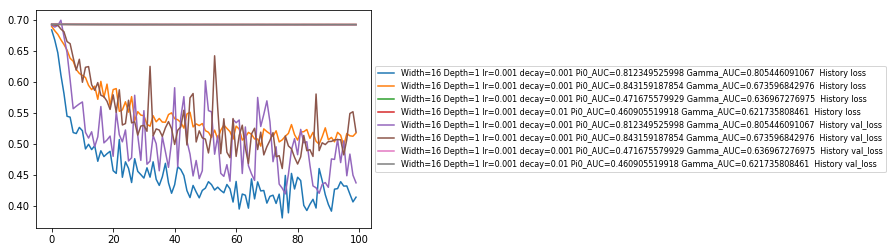

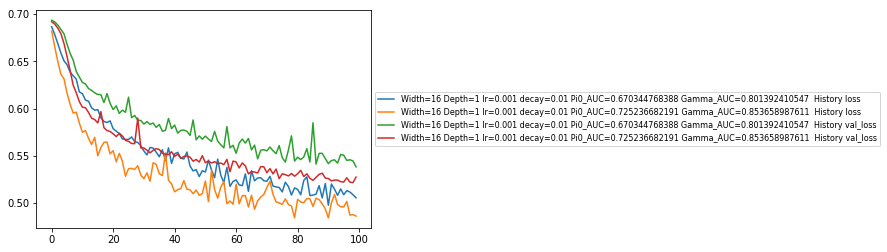

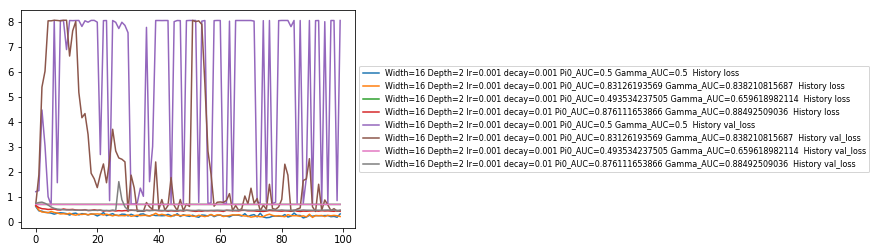

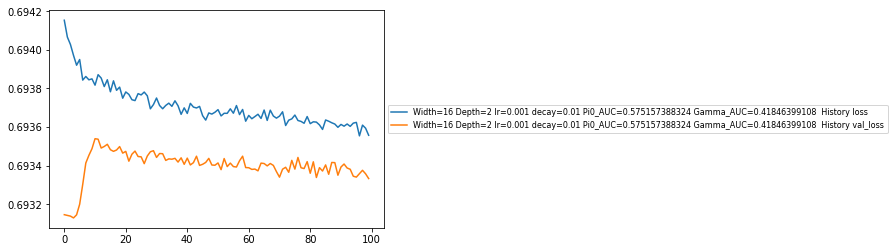

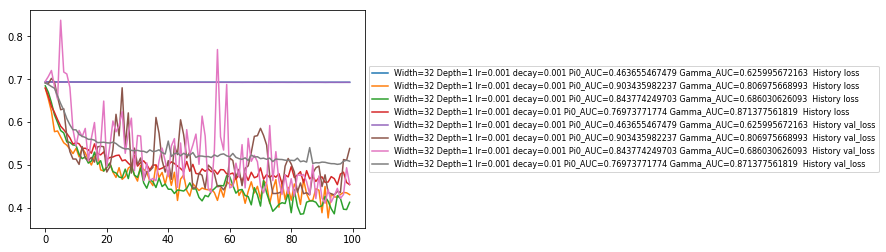

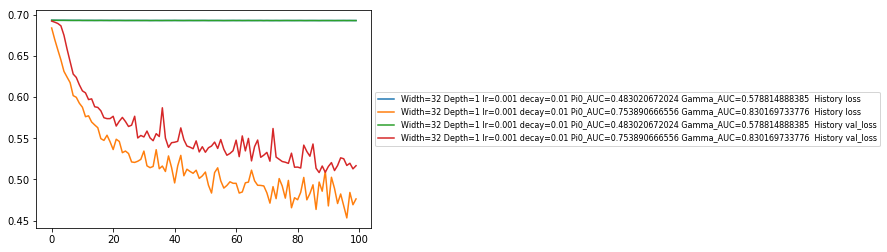

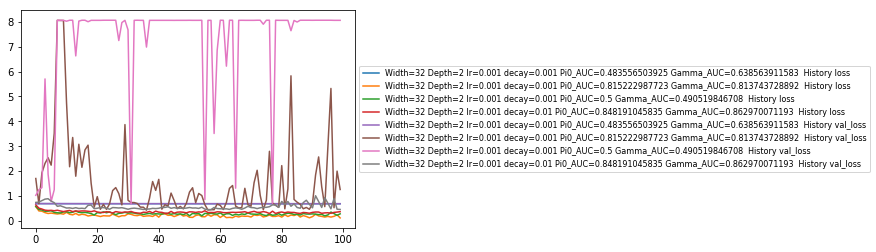

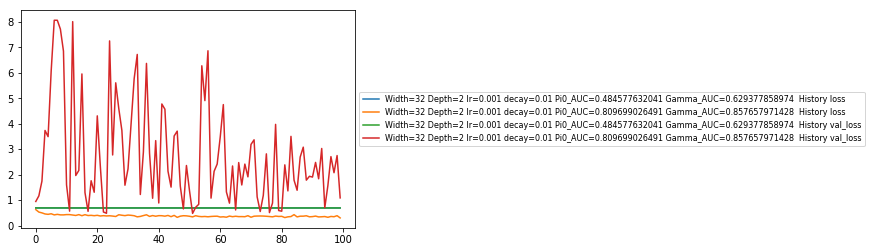

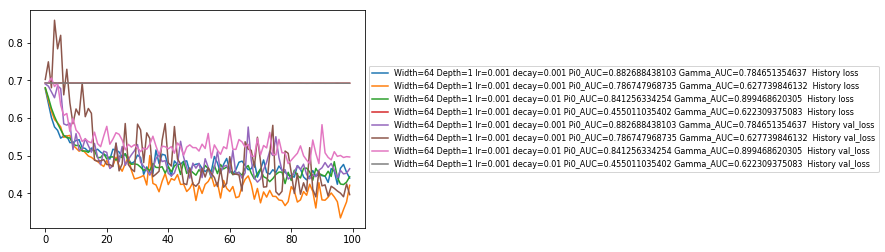

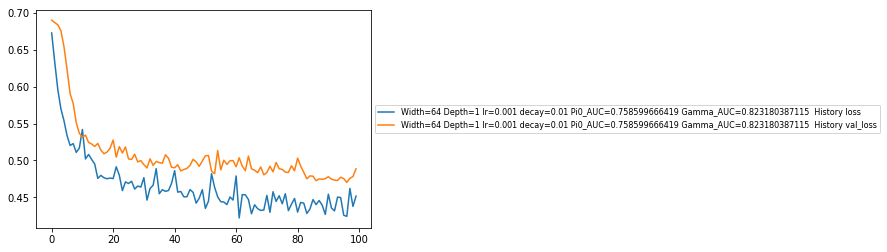

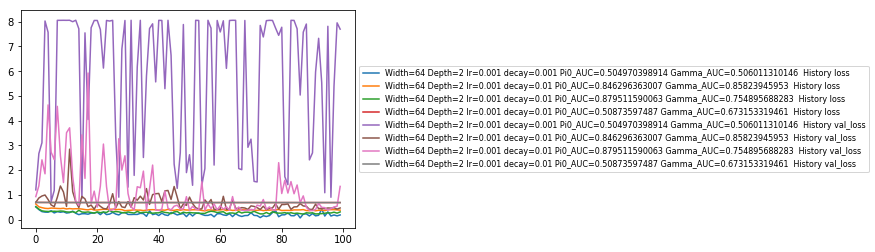

In [11]:
AnalyzeSubset("lr==0.001")

Number of Models: 31
Model Name                              Pi0_AUC    Gamma_AUC    FinalScore[0]
------------------------------------  ---------  -----------  ---------------
Width=64 Depth=1 lr=0.001 decay=0.01     0.4550       0.6223           0.6926
Width=16 Depth=1 lr=0.01 decay=0.01      0.4588       0.6201           0.6921
Width=16 Depth=1 lr=0.001 decay=0.01     0.4609       0.6217           0.6929
Width=16 Depth=1 lr=0.01 decay=0.01      0.4656       0.5455           0.6934
Width=32 Depth=1 lr=0.001 decay=0.01     0.4830       0.5788           0.6927
Width=32 Depth=2 lr=0.001 decay=0.01     0.4846       0.6294           0.6918
Width=64 Depth=1 lr=0.01 decay=0.01      0.4998       0.6565           0.6911
Width=64 Depth=1 lr=0.01 decay=0.01      0.5000       0.6512           8.0608
Width=32 Depth=1 lr=0.01 decay=0.01      0.5000       0.6538           8.0447
Width=32 Depth=2 lr=0.01 decay=0.01      0.5066       0.6567           0.6889
Width=64 Depth=2 lr=0.001 decay=0.01     0.

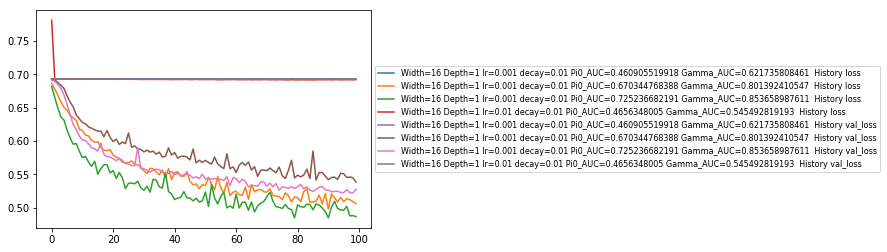

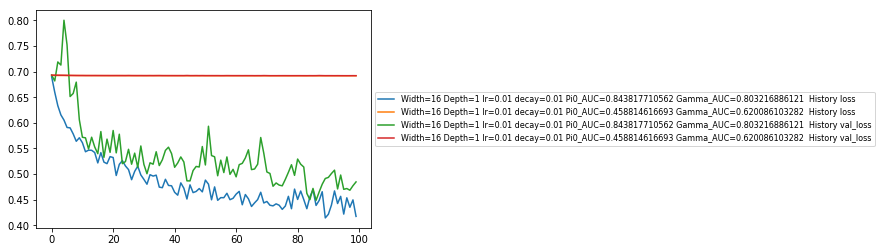

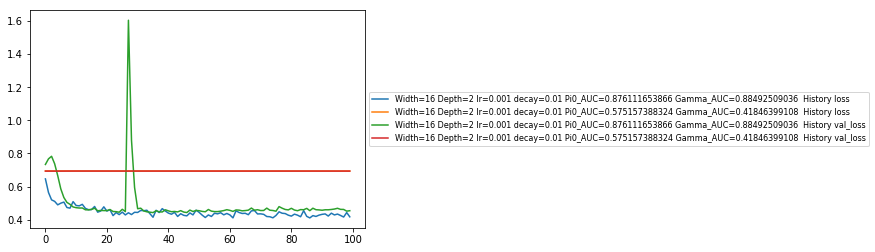

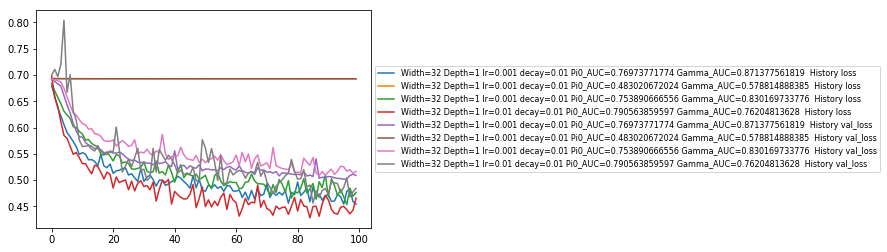

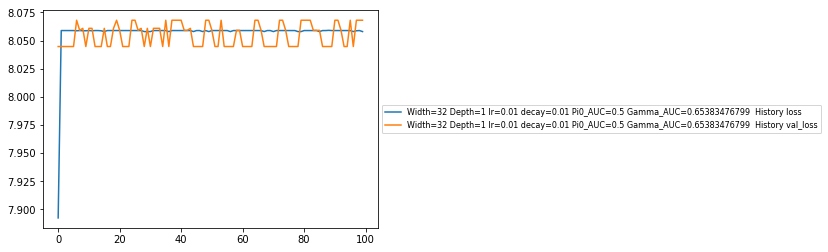

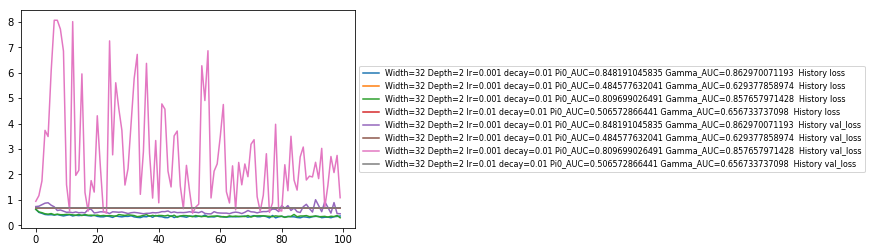

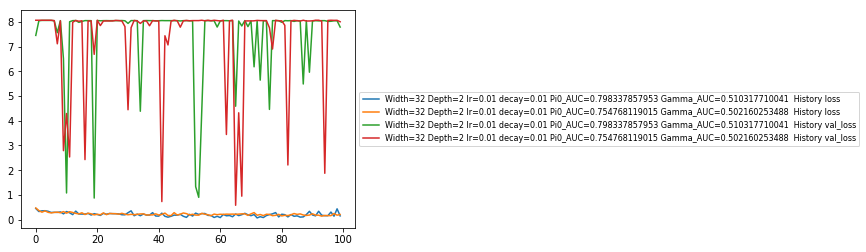

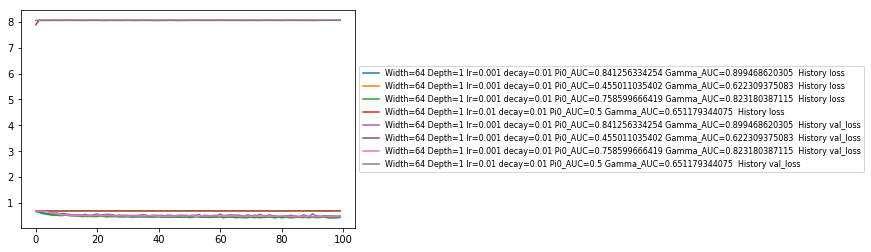

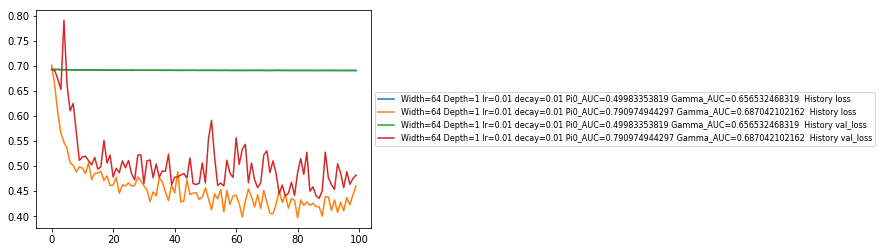

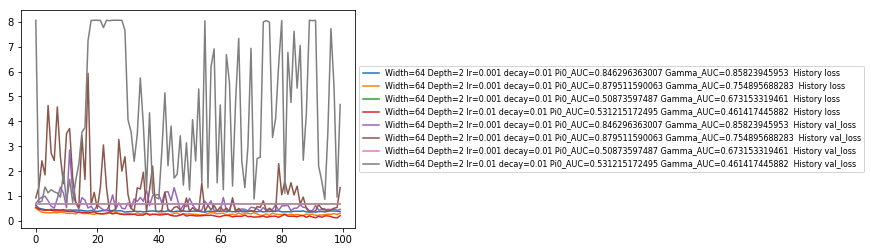

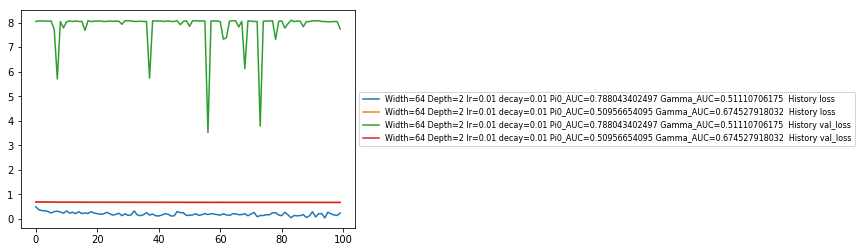

In [12]:
AnalyzeSubset("decay==0.01")

Number of Models: 7
Model Name                              Pi0_AUC    Gamma_AUC    FinalScore[0]
------------------------------------  ---------  -----------  ---------------
Width=16 Depth=1 lr=0.001 decay=0.01     0.7252       0.8537           0.5191
Width=64 Depth=1 lr=0.001 decay=0.01     0.7586       0.8232           0.4843
Width=32 Depth=1 lr=0.001 decay=0.01     0.7697       0.8714           0.5108
Width=64 Depth=2 lr=0.001 decay=0.01     0.8463       0.8582           0.4687
Width=32 Depth=2 lr=0.001 decay=0.01     0.8482       0.8630           0.4574
Width=16 Depth=1 lr=0.001 decay=0.01     0.8656       0.8656           0.5191
Width=16 Depth=2 lr=0.001 decay=0.01     0.8761       0.8849           0.4463


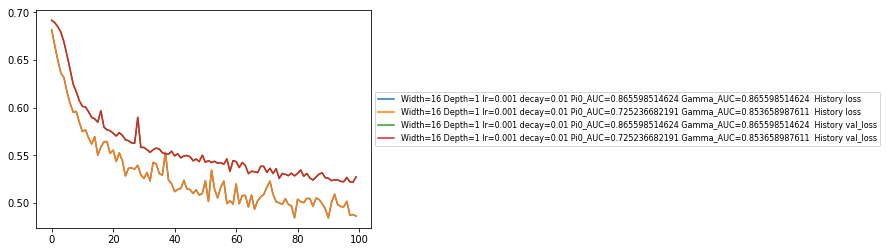

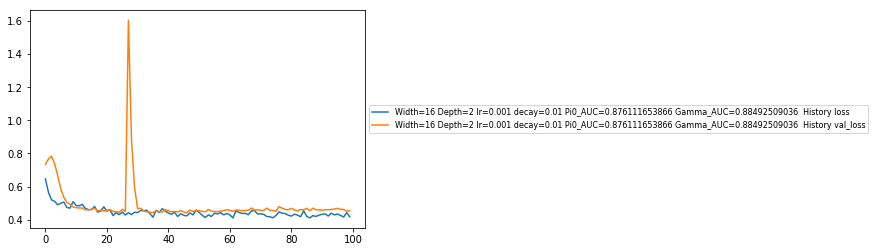

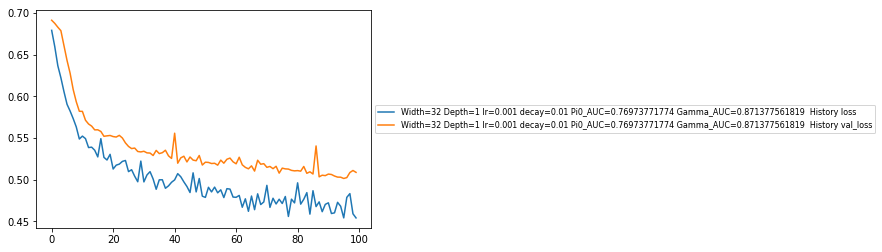

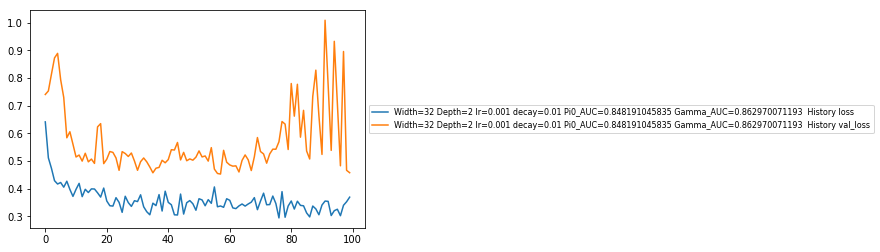

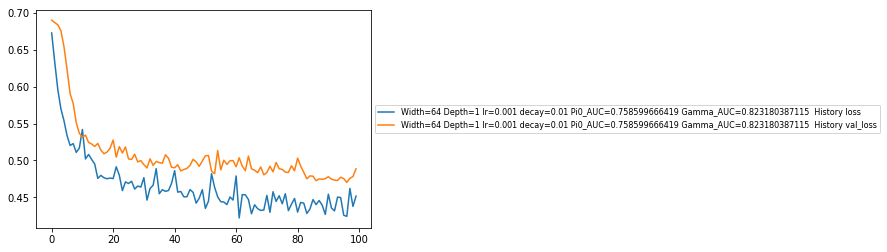

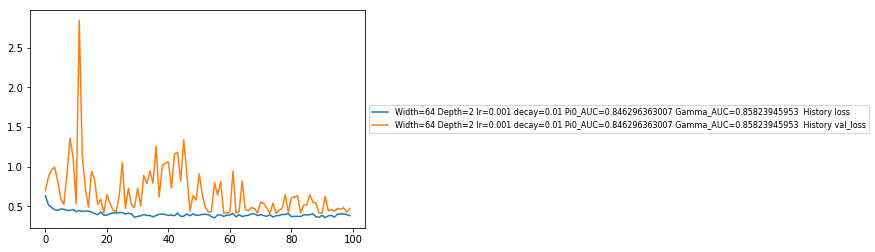

In [8]:
#AnalyzeSubset("optimizer=='RMSprop' and lr==0.01 and decay==0.001")
AnalyzeSubset("optimizer=='Adam' and lr==0.001 and decay==0.01")

# Compare Number of Epochs each model ran (only last run)
#PlotMetaData(MyModels,["Epochs"])

Number of Models: 1
Model Name                                                                Pi0_AUC    Gamma_AUC    FinalScore[0]
----------------------------------------------------------------------  ---------  -----------  ---------------
Width=16 Depth=2 lr=0.001 decay=0.01 optimizer='Adam' HyperParamSet=40     0.8761       0.8849           0.4463


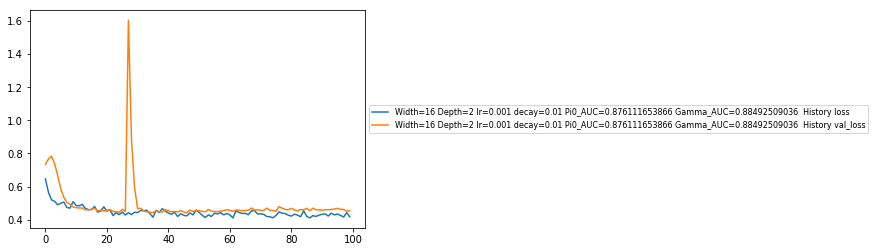

In [14]:
AnalyzeSubset("Pi0_AUC> 0.85 and Gamma_AUC>0.85", labels=["Width","Depth","lr","decay","optimizer","HyperParamSet"])



In [8]:
def AnalyzeSubsetAcc(expression,labels=["Width","Depth","lr","decay"]):
    ResetNames(MyModels,labels)
    M1=SelectModels(MyModels,MetaDataEvaluator(expression,params=["optimizer"]))
    print "Number of Models:",len(M1)
    ScanTable(M1,['Model Name','Pi0_AUC','Gamma_AUC',"FinalScore[0]"],[1,2])
    ResetNames(MyModels,["Width","Depth","lr","decay",'Pi0_AUC','Gamma_AUC'])
    PlotMetaDataMany(M1,4,
                     [["History","acc"],["History","val_acc"]],
                     sort=["Width","Depth","lr","decay"],switch=["Width","Depth"],loc="center left")

Number of Models: 1
Model Name                              Pi0_AUC    Gamma_AUC    FinalScore[0]
------------------------------------  ---------  -----------  ---------------
Width=16 Depth=1 lr=0.001 decay=0.01     0.7179       0.7179           0.5358


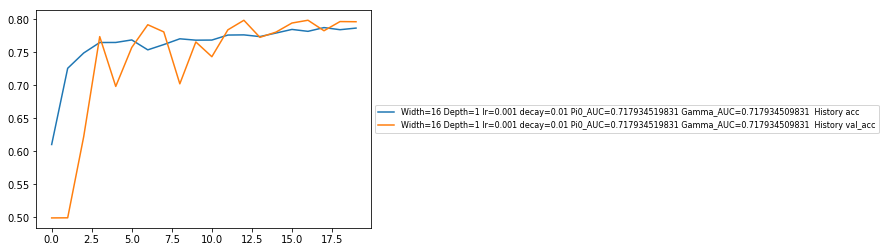

In [9]:
AnalyzeSubsetAcc("optimizer=='Adam'")

Number of Models: 1
Model Name                                                                Pi0_AUC    Gamma_AUC    FinalScore[0]
----------------------------------------------------------------------  ---------  -----------  ---------------
Width=16 Depth=2 lr=0.001 decay=0.01 optimizer='Adam' HyperParamSet=40     0.8761       0.8849           0.4463


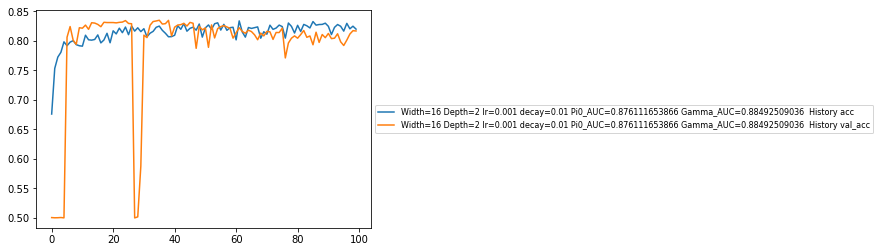

In [16]:
AnalyzeSubsetAcc("Pi0_AUC> 0.85 and Gamma_AUC>0.85", labels=["Width","Depth","lr","decay","optimizer","HyperParamSet"])

Pi0_AUC


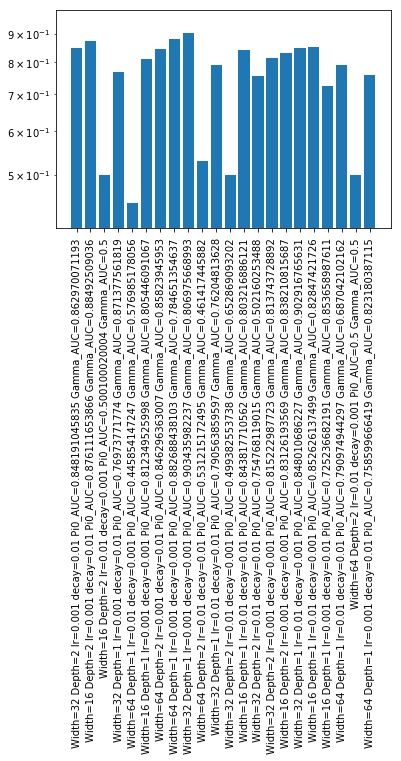

Gamma_AUC


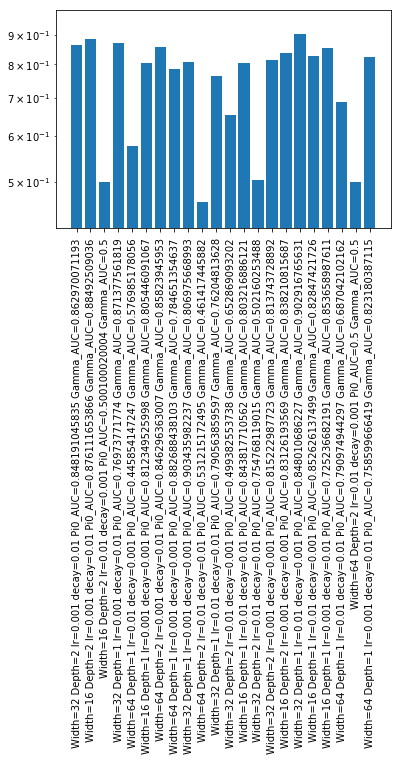

In [17]:
# Compare AUCs
for p in ['Pi0_AUC', 'Gamma_AUC']:
    print p
    PlotMetaData(SelectModels(MyModels,MetaDataEvaluator("optimizer=='Adam'",params=["optimizer"])),[p],log=True)
    plt.show()

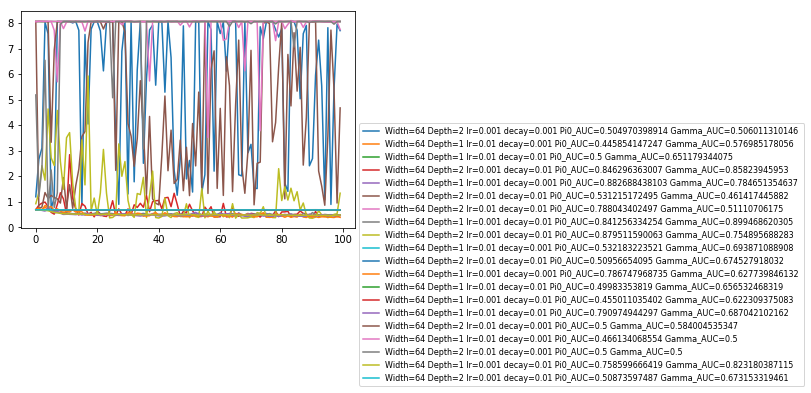

In [18]:
# Select models with width==32 and plot val_loss.
PlotMetaData(filter(lambda m: m.MetaData["Width"]==64, MyModels), ["History","val_loss"],loc=0)

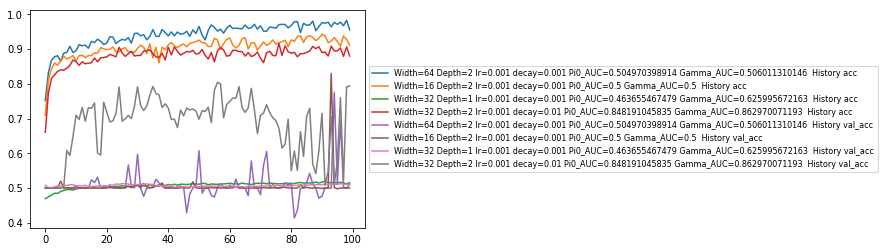

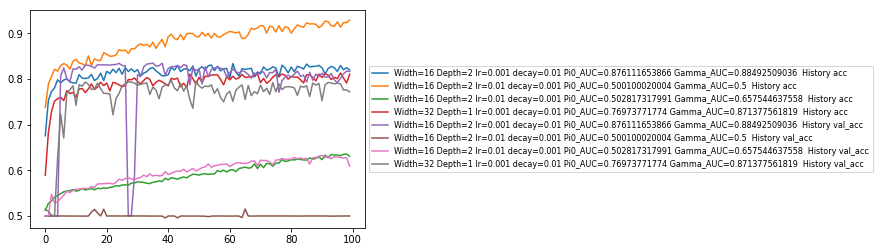

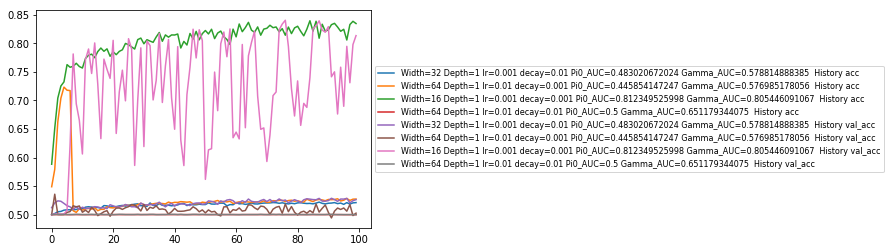

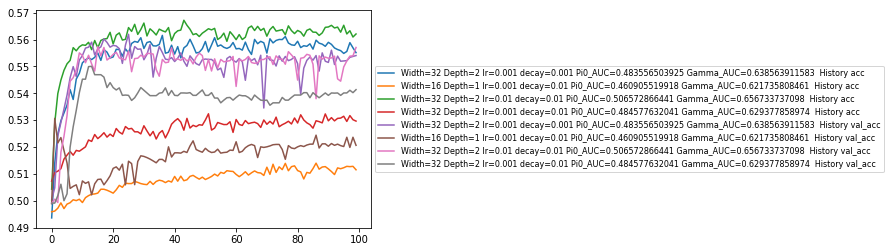

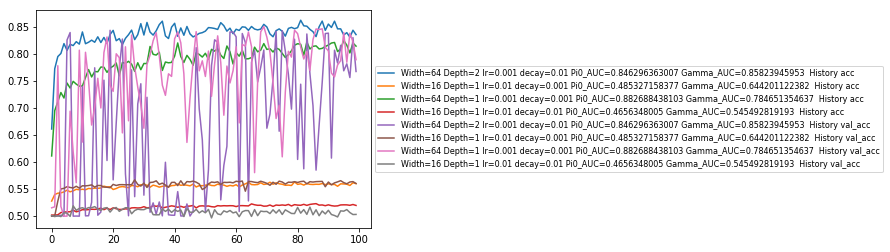

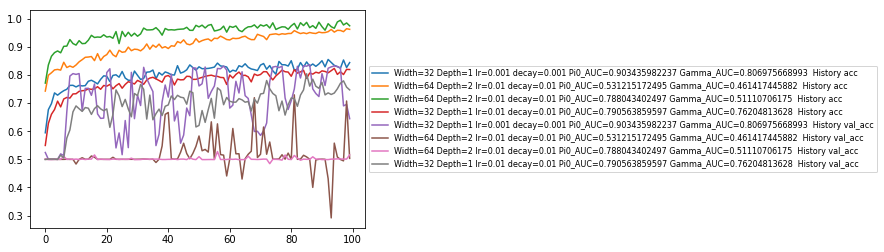

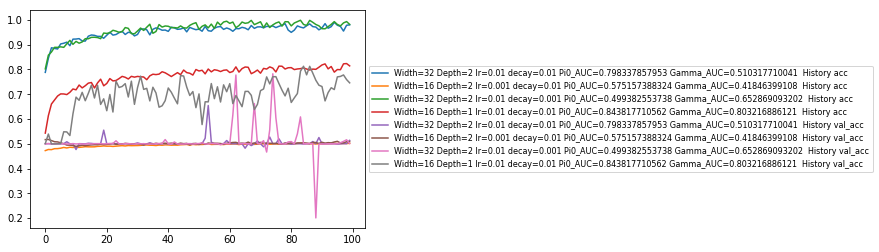

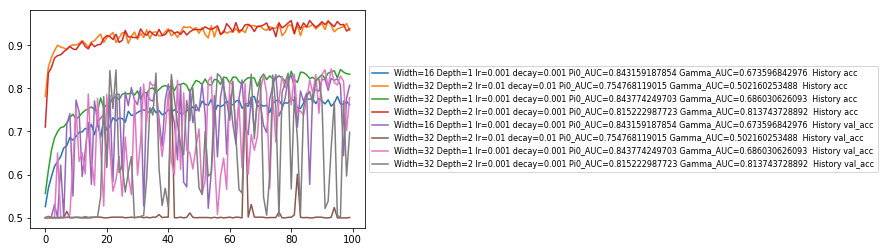

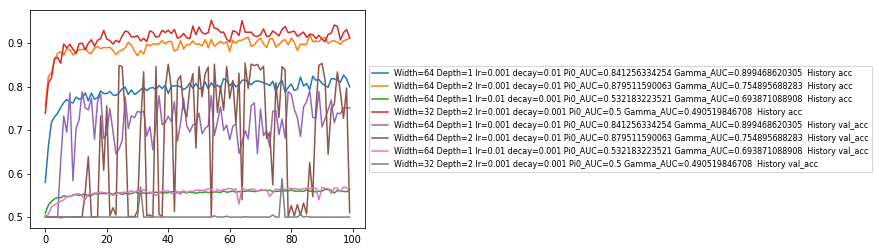

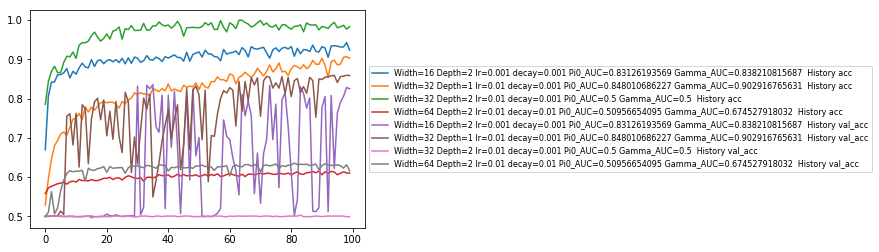

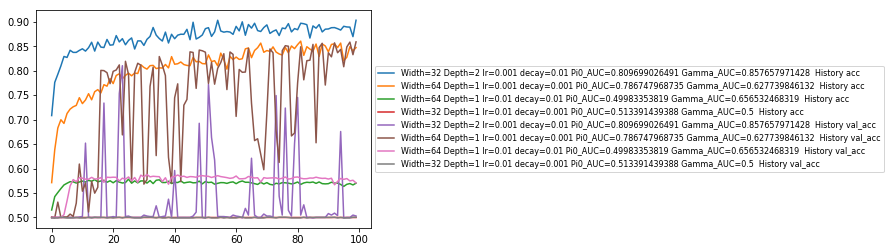

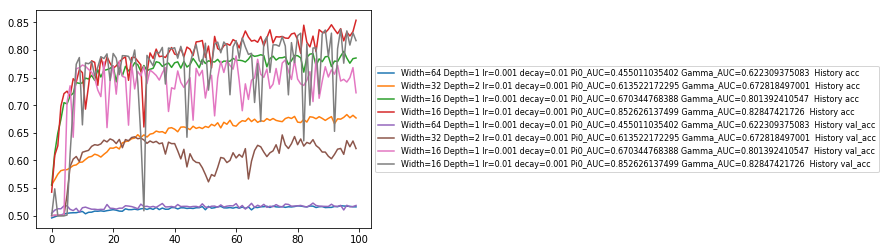

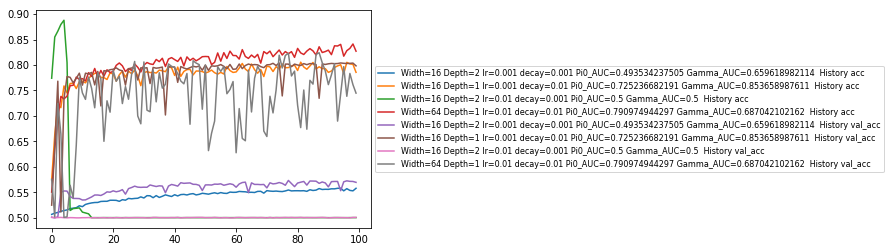

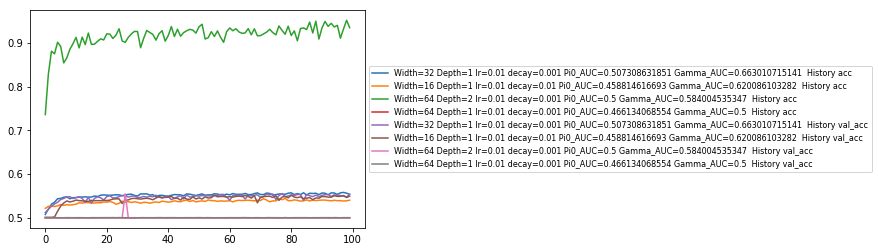

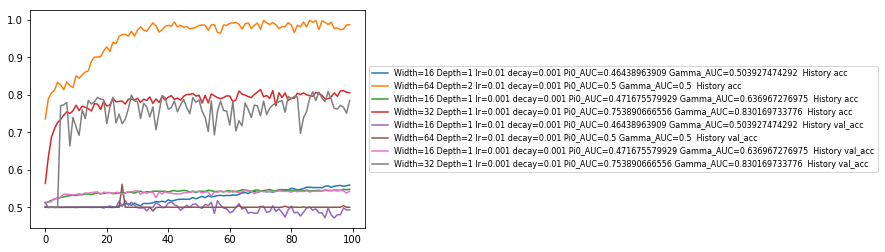

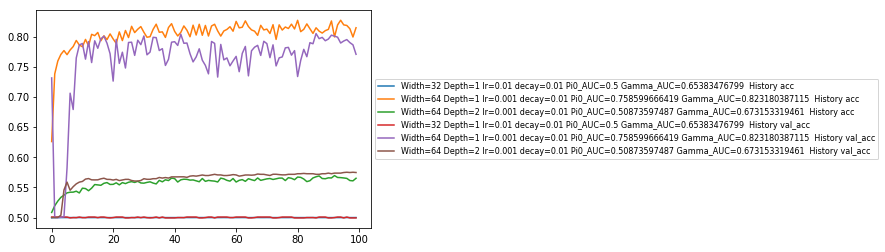

In [19]:
PlotMetaDataMany(MyModels,4,[["History","acc"],["History","val_acc"]],loc="center left")

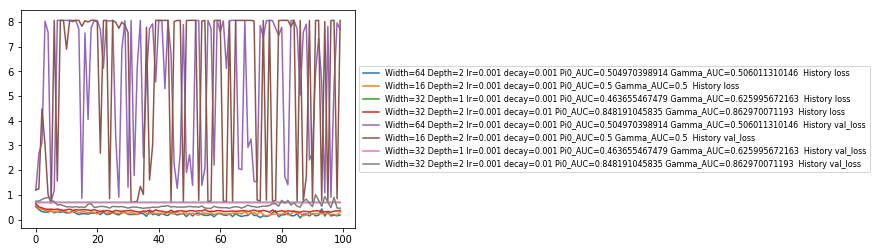

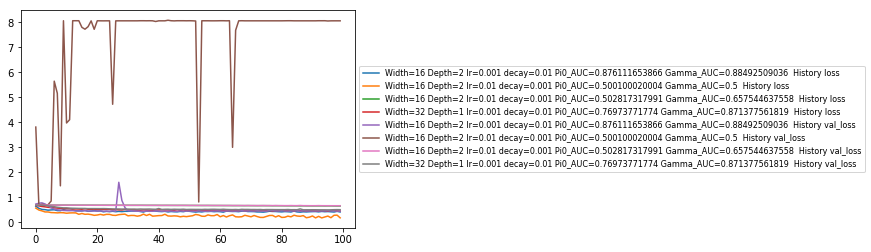

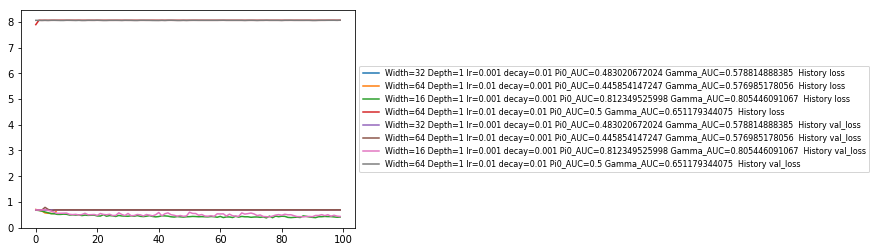

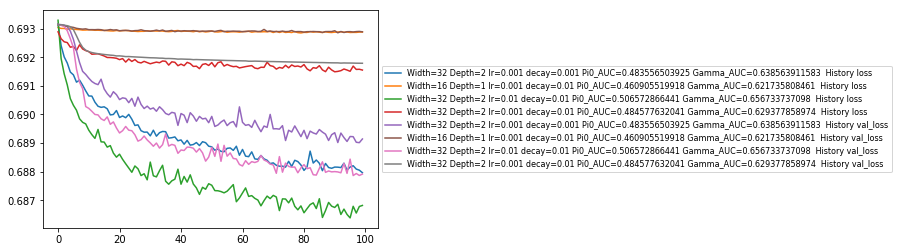

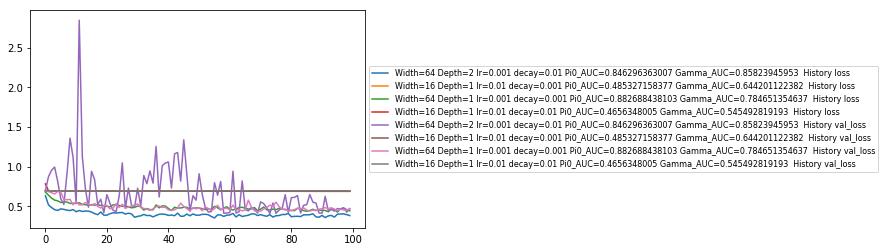

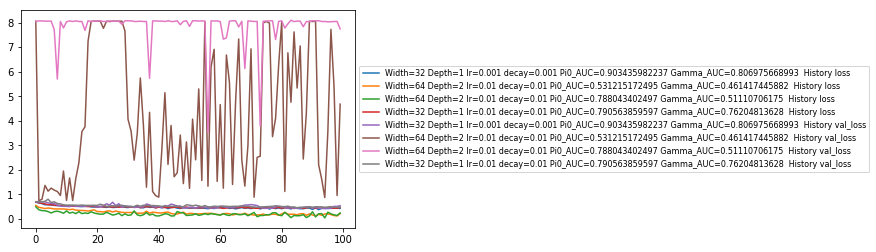

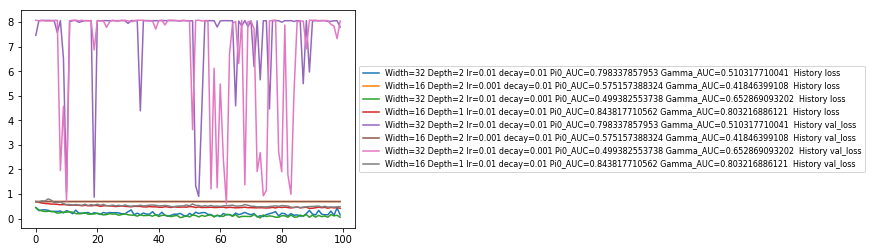

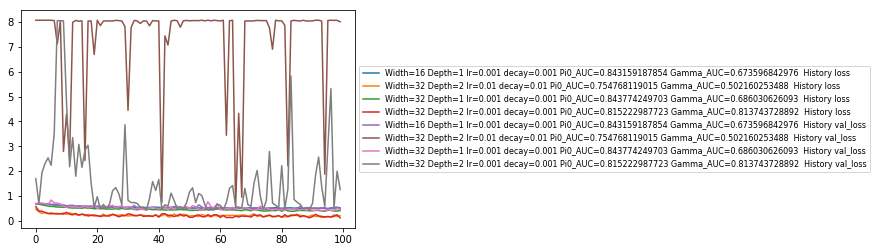

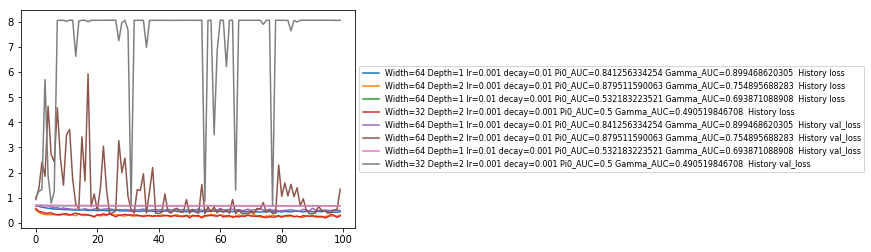

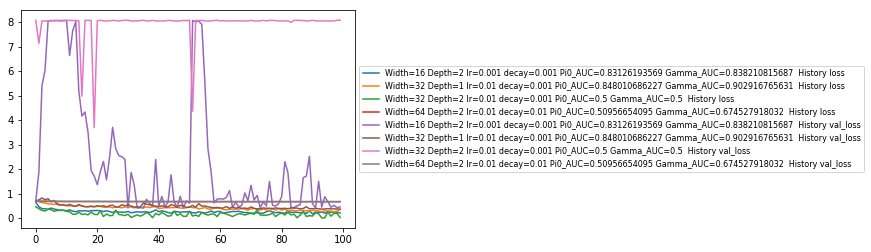

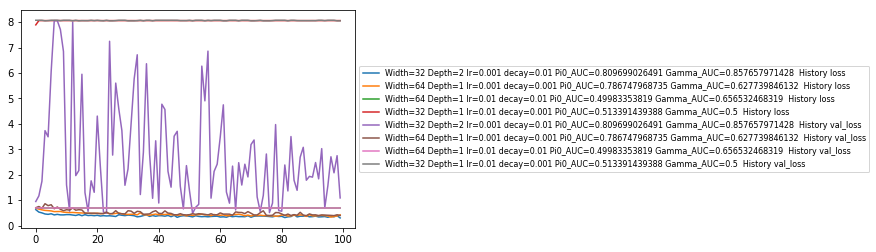

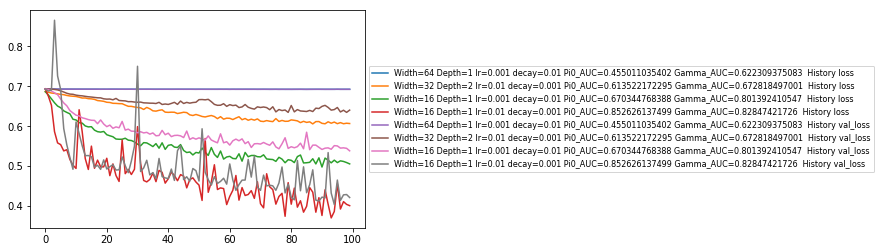

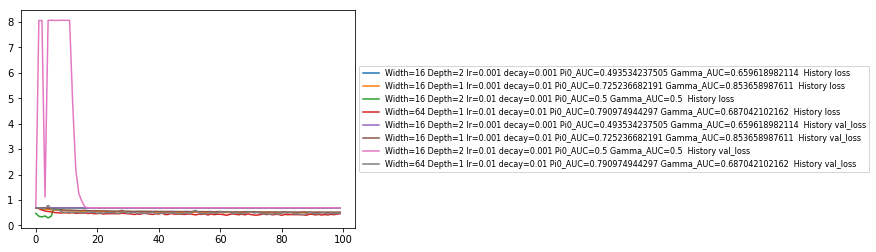

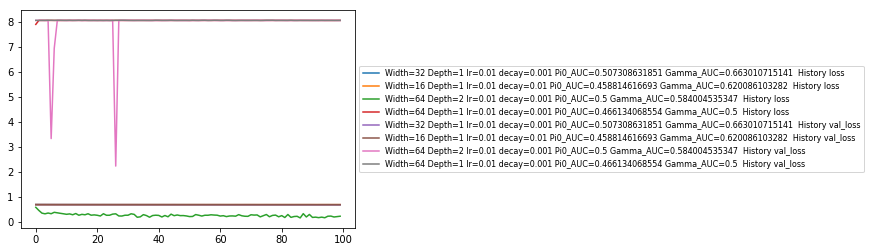

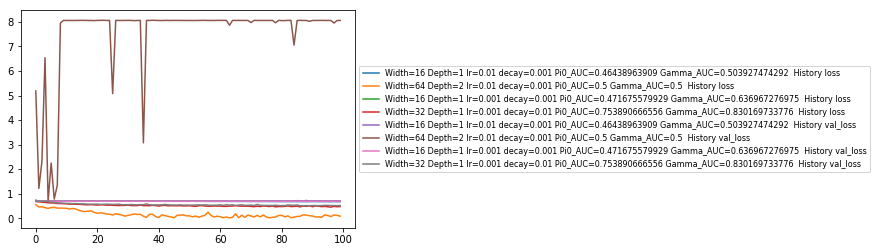

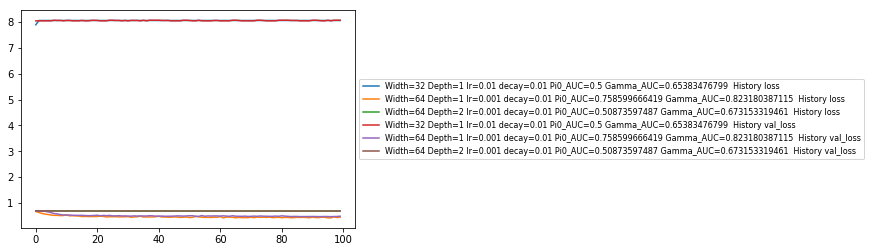

In [20]:
PlotMetaDataMany(MyModels,4,[["History","loss"],["History","val_loss"]],loc="center left")

In [24]:
# Plot a varible for all trainings. This was pulled together above.
#PlotMetaData(MyModels,["All_History.val_loss"],loc="center left")

In [25]:
#PlotMetaData(SelectModels(MyModels,lambda(m): m.MetaData["lr"]==0.01),["All_History.val_loss"],loc="center left")

In [26]:
#MyModels[0].MetaData["lr"]


In [10]:
MyModels[0].MetaData["Epochs"]

40

In [28]:
#len(MyModels[0].MetaData)

In [29]:
#MyModels[0].MetaData.keys()

In [22]:
#PlotMetaDataMany(MyModels,2,[["History","acc"],["History","val_acc"]],loc="center left")

In [23]:
#PlotMetaData(MyModels, ["History","acc"],loc=0)